In [1]:
%matplotlib inline
import main
import spark_greedy
from pyspark import SparkContext
import matplotlib.pyplot as plt

In [2]:
sc = SparkContext("local", "100_run")

In [3]:
NC_digraph = main.import_graph("nc_mini.json")

In [4]:
trials = spark_greedy.greedy_trials(sc, 100, NC_digraph, 3, 100, 10, 8)

In [9]:
_lambda = min(trials["results"])/max(trials["results"])
print min(trials["results"])
print max(trials["results"])
print _lambda

42.98
51.16
0.840109460516


(-20.0, 120.0, 42, 53)

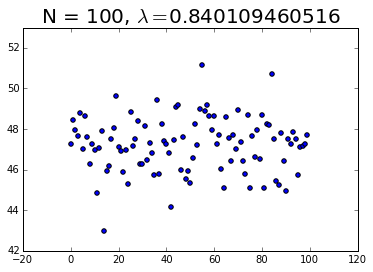

In [11]:
plt.scatter(range(0, len(trials["results"])),trials["results"])
plt.title(r'N = 100, $\lambda = $' + str(_lambda), fontsize=20)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,42,53))

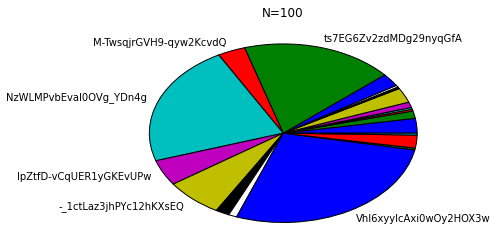

In [20]:
nodes_values = spark_greedy.node_count(trials)
patches, texts = plt.pie(nodes_values.values(), labels=map(lambda x: "" if nodes_values[x] < 10 else x ,nodes_values.keys()))
texts[0].set_fontsize(1)
plt.title("N=100")

In [12]:
import json
class SetEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, set):
            return list(obj)
        return json.JSONEncoder.default(self, obj)
fd = open("sparkruns/100info.json","w")
json.dump(trials, fd, cls=SetEncoder)
fd.close()